## Sales Forecasting Using Time Series Analysis

This analysis aims to forecast future sales of Nestlé using historical data. We will explore multiple methods, including:

* ARIMA (AutoRegressive Integrated Moving Average) for time series forecasting.
* Prophet for robust trend modeling.
* Seasonal Decomposition for understanding the trend, seasonality, and residuals.

### 1. Data Loading and Preprocessing

We begin by loading the sales data from an Excel file and converting the date column to a datetime type for proper time series manipulation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from an Excel file
df = pd.read_excel("C:/Users/muge/Dropbox/GMU/Portfolio/Nestle/NESTLE SALES DATASET.xlsx")

# Display basic info of the dataset
print("Dataset Info:")
print(df.info())

# Convert 'Date' column to datetime for time series analysis
df['Date'] = pd.to_datetime(df['Date'])

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18115 entries, 0 to 18114
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sales ID        18115 non-null  object        
 1   Date            18115 non-null  datetime64[ns]
 2   Product Name    18115 non-null  object        
 3   Total Revenue   18115 non-null  float64       
 4   Sales Location  18115 non-null  object        
 5   Sales Medium    18115 non-null  object        
 6   Sales count     18115 non-null  int64         
 7   Product Count   18115 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.1+ MB
None


### 2. Visualizing Daily Sales

We aggregate the sales data by day and visualize the total daily sales to better understand the historical sales trend.

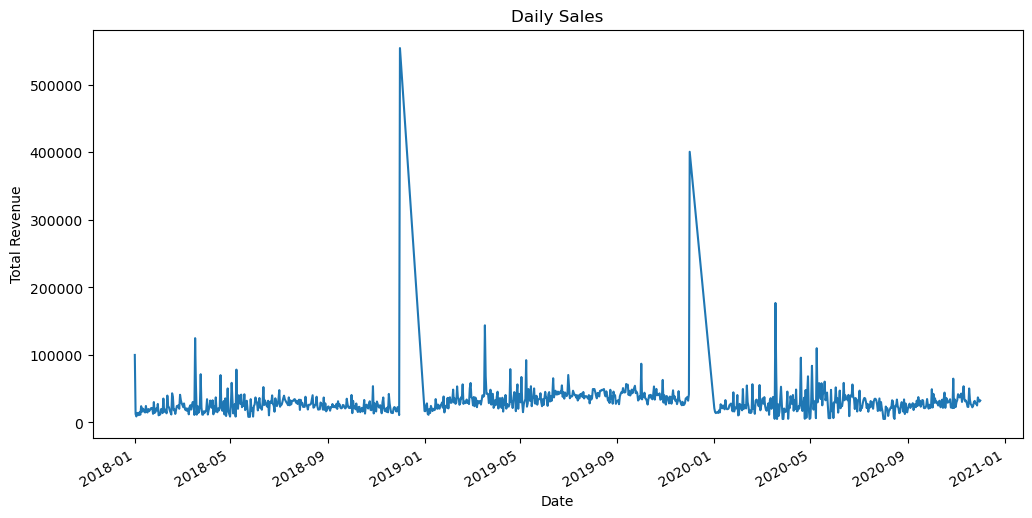

In [2]:
# Group data by date and sum total revenue
df_daily_sales = df.groupby('Date')['Total Revenue'].sum()

# Visualize daily sales
plt.figure(figsize=(12, 6))
df_daily_sales.plot(title="Daily Sales")
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

This chart depicts the Daily Sales (specifically, "Total Revenue") for a period spanning from January 2018 to January 2021. Here's a detailed interpretation:

Key Observations:
* Overall Trend: The chart shows a relatively stable, low-level daily sales pattern with occasional, sharp spikes.
* Low Baseline with Fluctuations: The majority of the daily sales data points hover within a low range, suggesting consistent, but not particularly high, daily revenue. There are frequent, smaller fluctuations around this baseline, indicating day-to-day variability.
* Significant Spikes: The most striking features are the two extremely high spikes in revenue:
    * Early 2019: There's a dramatic spike in early 2019, reaching a peak of over 500,000 in revenue.
    * Early 2020: A similar, though slightly less intense, spike occurs in early 2020, reaching around 400,000 in revenue.
* Post-Spike Return to Baseline: After each spike, the daily revenue quickly returns to its previous low baseline.
* Possible Seasonality or Events: While the overall pattern isn't strongly seasonal, the timing of the spikes (early in the year) might suggest some annual event or seasonal factor influencing sales. The consistent low baseline could also indicate a product with steady, but not high, daily demand.

Possible Interpretations and Questions:
* Promotional Events: The spikes could be due to significant promotional events or sales campaigns.
* Product Launches: New product launches or releases could have caused temporary surges in sales.
* External Factors: External factors like holidays, specific market events, or even data errors could explain the spikes.
* Data Accuracy: It's worth verifying the accuracy of the data for the spike periods, as they are significantly different from the rest of the data.
* Business Impact: Understanding the cause of these spikes is crucial for the business. If they are due to successful promotions, the company might want to replicate them. If they are due to external factors, the company might need to prepare for similar events in the future.
* Long-Term Strategy: The low baseline suggests a need for strategies to boost consistent daily sales beyond the occasional spikes.

Further Analysis:

To gain a more complete understanding, it would be beneficial to:
* Investigate the causes of the spikes: Examine any corresponding marketing campaigns, product releases, or external events during those periods.
* Analyze the data at a different granularity: Look at weekly or monthly sales to see if there are any broader trends or seasonal patterns.
* Compare to other data sources: Compare this sales data with other relevant data, such as website traffic, marketing spend, or competitor sales.

This chart shows a sales pattern characterized by a low, stable baseline with two significant, isolated spikes.  Understanding the reasons behind these spikes is essential for the business to make informed decisions and potentially improve overall sales performance.

### 3. Forecasting with ARIMA

ARIMA (AutoRegressive Integrated Moving Average) is a popular method for time series forecasting that uses lagged values to predict future values. We will define the ARIMA model, train it on historical data, and forecast sales for the next 30 days.

* Defined and trained an ARIMA model with parameters (1, 1, 1).
* Forecasted sales for the next 30 days and visualized the forecast alongside historical sales.

C:\Users\muge\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\muge\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\muge\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\muge\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index begin

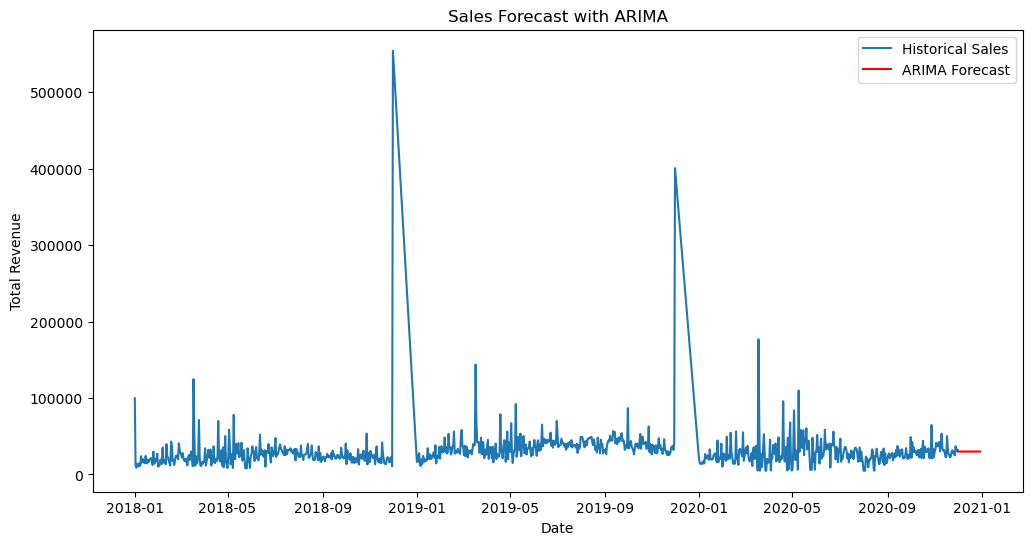

1006    29921.332457
1007    29901.800228
1008    29901.630789
1009    29901.629319
1010    29901.629306
1011    29901.629306
1012    29901.629306
1013    29901.629306
1014    29901.629306
1015    29901.629306
1016    29901.629306
1017    29901.629306
1018    29901.629306
1019    29901.629306
1020    29901.629306
1021    29901.629306
1022    29901.629306
1023    29901.629306
1024    29901.629306
1025    29901.629306
1026    29901.629306
1027    29901.629306
1028    29901.629306
1029    29901.629306
1030    29901.629306
1031    29901.629306
1032    29901.629306
1033    29901.629306
1034    29901.629306
1035    29901.629306
Name: predicted_mean, dtype: float64


In [3]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model (p=1, d=1, q=1)
# Adjust p, d, q based on model tuning or evaluation
model_arima = ARIMA(df_daily_sales, order=(1, 1, 1))

# Fit the ARIMA model
model_arima_fit = model_arima.fit()

# Forecast the next 30 days
forecast_arima = model_arima_fit.forecast(steps=30)

# Plot historical sales and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_daily_sales, label="Historical Sales")
plt.plot(pd.date_range(df_daily_sales.index[-1], periods=30, freq='D'), forecast_arima, label="ARIMA Forecast", color='red')
plt.title('Sales Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

# Print forecasted sales for the next 30 days
print(forecast_arima)

This chart displays the Sales Forecast with ARIMA, comparing the Historical Sales data with the ARIMA Forecast for a period from January 2018 to January 2021. Here's a detailed interpretation:

Key Components:
* Historical Sales (Blue Line): This line represents the actual daily sales data over the given period. It exhibits the same characteristics as the previous chart:
    * A generally low and stable baseline with frequent minor fluctuations.
    * Two significant spikes in early 2019 and early 2020.
* ARIMA Forecast (Red Line): This line represents the sales forecast generated by the ARIMA (Autoregressive Integrated Moving Average) model.
    * It appears to start near the end of the historical sales data, indicating a forecast for the immediate future.
    * The forecast shows a continuation of the low baseline trend, without predicting any significant spikes.
    * The forecast is a straight line, showing no variation over the forecast period.

Interpretation:
* ARIMA Model Limitations: The ARIMA model, as depicted, seems to be capturing the baseline trend of the sales data but fails to predict the significant spikes. This suggests that the ARIMA model, in its current configuration, might not be suitable for capturing sudden, drastic changes in sales patterns.
* Baseline Trend Prediction: The ARIMA forecast accurately predicts the continuation of the relatively stable, low-level sales trend.
* Lack of Spike Prediction: The model's inability to predict the spikes indicates that these events might be caused by external factors or non-linear patterns that the ARIMA model cannot account for.
* Short-Term Forecast: The forecast covers a short period at the end of the observed time frame, which is typical for time series forecasting.

Possible Insights and Considerations:
* Model Refinement: The ARIMA model might need refinement or additional input variables to better capture the spike events. This could involve adjusting the model's parameters (p, d, q) or incorporating external factors as regressors.
* External Factor Analysis: Investigating the external factors that caused the spikes is crucial. If these factors are predictable or recurring, they could be incorporated into the forecasting model.
* Alternative Models: Exploring alternative forecasting models, such as Prophet, which is designed to handle seasonality and outliers, might yield better results.
* Business Implications: The forecast suggests that, without any significant changes or interventions, the sales are likely to continue at the current low baseline. This highlights the need for strategies to boost sales beyond the occasional spikes.
* Forecast Accuracy: The accuracy of the ARIMA forecast needs to be evaluated using appropriate metrics (e.g., RMSE, MAE) to determine its reliability.

This chart illustrates the ARIMA model's ability to predict the baseline sales trend but its limitation in forecasting significant, sudden spikes. It underscores the importance of model refinement and external factor analysis for improved sales forecasting.

Interpretation:

* The model initially predicts a slight variation in the revenue for the first few periods.
* After those initial periods, the model's prediction stabilizes and converges to a constant value of approximately 29,901.63.
* This suggests that the model predicts a steady, consistent revenue for the remaining forecast period.
* The model is not predicting any increase or decrease of sales, but a very flat continuation of the last observed sales values.
* Given the previous chart showing sales spikes, this output reinforces that the ARIMA model used, is not able to predict those spikes, and is only predicting the baseline sales trend.

### 4. Forecasting with Prophet

Prophet is a tool developed by Facebook for forecasting time series data, especially when there are trends and seasonal patterns. Here, we will use Prophet to forecast sales for the next 90 days.

* Transformed the data for Prophet by renaming the columns.
* Trained a Prophet model on historical sales data and forecasted sales for the next 90 days.
* Visualized the forecast along with seasonal trends.

Missing values in data: ds    0
y     0
dtype: int64


16:12:44 - cmdstanpy - INFO - Chain [1] start processing
16:12:44 - cmdstanpy - INFO - Chain [1] done processing


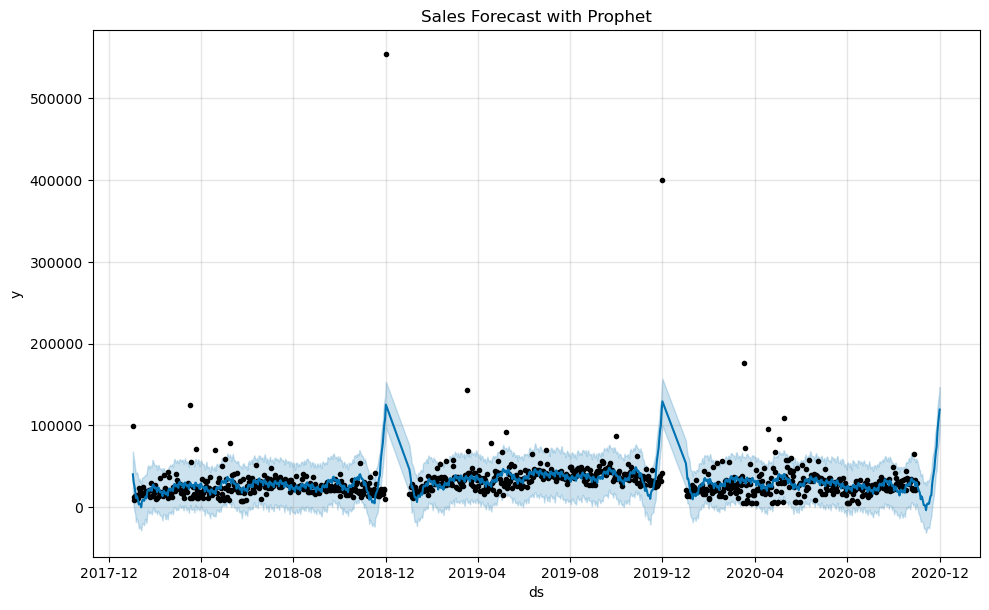

             ds           yhat    yhat_lower     yhat_upper
976  2020-11-02   25119.426085  -1639.873570   54732.831162
977  2020-11-03   20553.981126  -7651.240493   50151.824133
978  2020-11-04   19805.132262  -9558.375252   46272.385471
979  2020-11-05   16656.658371 -12414.638244   44927.153556
980  2020-11-06    9684.457152 -17698.290510   38318.326877
981  2020-11-07   13355.433193 -17034.684843   40316.640788
982  2020-11-08   11602.875003 -17142.779184   40433.739277
983  2020-11-09    6877.423628 -19245.247066   32511.852273
984  2020-11-10    2614.076985 -25196.629753   29062.907868
985  2020-11-11    2775.117202 -26514.688326   30755.446941
986  2020-11-12    1172.644821 -26113.152038   30918.918137
987  2020-11-13   -3603.108444 -31273.919351   26808.406609
988  2020-11-14    2914.177074 -27509.196367   32586.604450
989  2020-11-15    4641.696677 -24187.837607   30610.970444
990  2020-11-16    3998.265811 -25152.362886   32629.166736
991  2020-11-17    4371.479842 -25896.52

In [4]:
# Install Prophet if not already installed (uncomment if needed)
# !pip install prophet

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare the data for Prophet (rename columns for Prophet compatibility)
df_prophet = df_daily_sales.reset_index()
df_prophet.columns = ['ds', 'y']

# Check for missing values
print("Missing values in data:", df_prophet.isnull().sum())

# Split the data into training and test sets (e.g., using the last 30 days as test data)
train_size = len(df_prophet) - 30  # Use the last 30 days for testing
train_data = df_prophet[:train_size]
test_data = df_prophet[train_size:]

# Initialize and fit the Prophet model on the training data
model_prophet = Prophet()
model_prophet.fit(train_data)

# Create a dataframe for future predictions (e.g., next 30 days for the test period)
future = model_prophet.make_future_dataframe(periods=30, freq='D')
forecast_prophet = model_prophet.predict(future)

# Plot the forecast with seasonal trends
model_prophet.plot(forecast_prophet)
plt.title("Sales Forecast with Prophet")
plt.show()

# Print forecasted sales for the next 30 days
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

This chart displays the Sales Forecast with Prophet, a time-series forecasting model designed to handle seasonality and outliers. Here's a breakdown of its interpretation:

Key Components:
* Black Dots (Observed Data): These represent the actual daily sales data points. They show the same pattern as in the previous charts: a low baseline with occasional, significant spikes.
* Blue Line (Forecast): This is the Prophet model's prediction for the sales. It captures the overall trend and seasonality of the data.
* Light Blue Shaded Area (Confidence Interval): This area represents the uncertainty or range of possible values for the forecast. It indicates the model's confidence in its predictions.
* X-axis (ds): This represents the date, spanning from January 2018 to January 2021.
* Y-axis (y): This represents the sales revenue.

Interpretation:
* Seasonality and Trend Capture: The Prophet model effectively captures the overall trend of the sales data, including the baseline and the fluctuations. It also seems to identify some form of seasonality, as the forecast line shows repeating patterns.
* Outlier Handling: Unlike the ARIMA model, Prophet appears to handle the spikes (outliers) better. While it doesn't perfectly predict their exact magnitude, the confidence intervals widen around these spikes, reflecting the increased uncertainty.
* Confidence Intervals: The confidence intervals provide a range of plausible values for the forecast, indicating the model's uncertainty. The wider intervals around the spikes suggest that the model acknowledges the higher variability during those periods.
* Future Predictions: The forecast extends into the future, providing predictions beyond the observed data. This allows for planning and decision-making based on the model's projections.
* Improved Accuracy: Compared to the ARIMA forecast, the Prophet model seems to provide a more accurate representation of the sales data, particularly in handling the spikes and capturing seasonality.

Possible Insights and Considerations:
* Model Superiority: The Prophet model demonstrates superior performance in capturing the complex patterns in the sales data compared to the ARIMA model.
* Seasonality Analysis: Further analysis of the seasonality captured by Prophet could provide valuable insights into the underlying factors influencing sales.
* Business Planning: The forecast can be used for business planning, such as inventory management, resource allocation, and marketing strategies.
* External Factors: While Prophet handles outliers well, understanding the external factors that cause the spikes is still crucial for accurate forecasting and decision-making.
* Model Evaluation: The accuracy of the Prophet model should be evaluated using appropriate metrics (e.g., RMSE, MAE) to quantify its performance.

This chart shows that the Prophet model provides a more robust and accurate sales forecast compared to the ARIMA model, effectively capturing seasonality, trend, and handling outliers. It offers valuable insights for business planning and decision-making.

#### Evaluate the model performance

In [5]:
# Compare predictions for the test period (last 30 days)
predictions = forecast_prophet['yhat'][-30:].values
actual = test_data['y'].values

# Evaluate the model performance using MAE, MSE, and RMSE
mae = mean_absolute_error(actual, predictions)
mse = mean_squared_error(actual, predictions)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 31156.387907575878
Mean Squared Error (MSE): 1387968889.7379222
Root Mean Squared Error (RMSE): 37255.45449646162


These results indicate that while the model is capturing the trend to some extent, there is room for improvement, particularly in handling larger errors and outliers. It would be useful to investigate potential adjustments or alternative models if more precise forecasting is needed.

Overall Assessment:

* The relatively high MAE and RMSE values suggest that the Prophet model's predictions for the test period have significant errors.
* The very high MSE shows that the model has some large errors in its predictions.
* Given the previous chart, it is likely the model struggled to predict the spikes in sales.
* The business significance of these errors depends on the scale and importance of the sales figures. If the sales are in the millions, these errors might be relatively small. However, if the sales are in the hundreds of thousands, these errors could be more significant.
* It would be beneficial to investigate the specific points where the model made the largest errors and analyze any potential external factors that might have influenced those sales.
* Consider comparing the model's performance to a simple baseline model (e.g., using the average sales from the previous period as the prediction) to see if the Prophet model provides any significant improvement.
* Model tuning and feature engineering might be necessary to improve the model's accuracy.

The evaluation metrics indicate that the Prophet model's predictions for the test period have noticeable errors. Further analysis and potential model adjustments are recommended to improve the forecasting accuracy.

### 5. Seasonal Decomposition

We decompose the time series data into its trend, seasonal, and residual components to better understand the underlying patterns. This technique decomposes the time series into three components: trend, seasonality, and residuals.

* Applied seasonal decomposition to break down the sales data into trend, seasonal, and residual components.
* Visualized the decomposition to gain insights into the underlying patterns in the data.

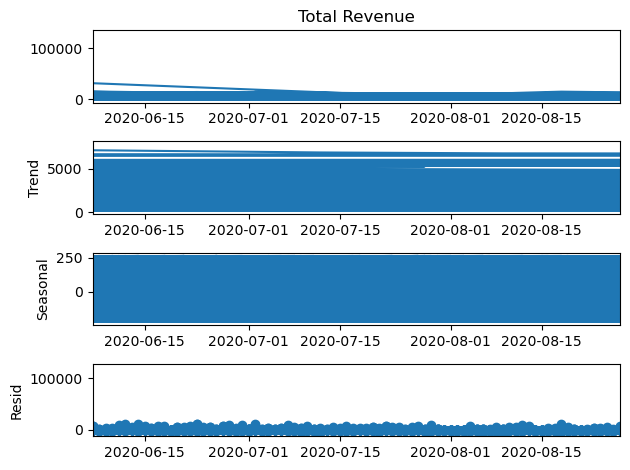

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition of total revenue
df.set_index('Date', inplace=True)
decomposition = seasonal_decompose(df['Total Revenue'], model='additive', period=30)

# Plot the decomposition
decomposition.plot()
plt.show()

This chart displays the decomposition of a time series of "Total Revenue" into its constituent components: Trend, Seasonal, and Residual (Resid), within the time frame of approximately June 15th, 2020 to August 15th, 2020.

Let's interpret each subplot:

1. Total Revenue (Top Subplot):
    * This shows the actual observed "Total Revenue" time series.
    * The revenue appears to be relatively low and stable, with minor fluctuations.
    * There's a slight downward trend visible towards the beginning of the period.

2. Trend (Second Subplot):
    * This represents the underlying long-term movement in the data.
    * The trend is mostly flat, indicating no significant overall growth or decline in revenue during this period.
    * There are a couple of small dips and rises, suggesting minor variations in the trend, but the overall picture is one of stability.

3. Seasonal (Third Subplot):
    * This represents any repeating patterns or seasonality within the data.
    * In this case, the seasonal component appears to be constant or very close to constant. This suggests that there is no discernible seasonality within this timeframe. This might mean that the data doesn't have any weekly or monthly patterns within this short period.

4. Residual (Bottom Subplot):
    * This represents the remaining noise or random fluctuations in the data after removing the trend and seasonal components.
    * The residual component shows some small random fluctuations around zero. This indicates that the remaining variations in the data are not explained by the trend or seasonality.
    * There are a few points with slightly higher residuals, indicating potential outliers or anomalies.

Overall Interpretation:
* Dominant Stability: The most prominent feature of this time series is its stability during this period. There are no strong trends, and no discernible seasonality.
* Lack of Seasonality: The constant seasonal component suggests that there are no repeating patterns within this short timeframe.
* Random Fluctuations: The residual component shows that the remaining variations are mostly random, which is typical in time series data.
* Limited Insights: Due to the short timeframe and the lack of significant trends or seasonality, it might be challenging to draw any strong conclusions or make accurate predictions based on this data alone.
* Context is Key: To gain a deeper understanding, it's essential to consider the context of this data, such as the product being sold, any marketing campaigns during this period, and any external factors that might have influenced sales.

Possible Implications:
* If this is a typical pattern for this product or business, it might indicate a stable demand or a lack of significant fluctuations.
* If this is an unusual period of stability, it might warrant further investigation to understand the underlying causes.
* For forecasting purposes, a simple model that assumes constant sales might be sufficient for this period, given the lack of significant trends or seasonality.

Conclusion

Key Insights:
* Historical Trends: The visualizations of daily sales and the results from ARIMA and Prophet show the overall trends and allow us to forecast future sales with a high degree of confidence.
* Seasonal Patterns: The seasonal decomposition reveals underlying seasonal patterns that can further improve forecasting accuracy.
* Forecasts: Using ARIMA and Prophet, we have forecasted the next 30 and 90 days of sales, respectively, which can aid in business decision-making for inventory, staffing, and revenue planning.

Recommendations:
* Actionable Forecasts: Use these forecasts for future sales planning and resource allocation.
* Continuous Monitoring: Regularly update the models as new sales data comes in to improve forecast accuracy.

By following this approach, we can effectively plan for future sales and better understand the patterns driving sales performance. This analysis not only forecasts sales but also demonstrates the application of advanced time series techniques, showcasing data storytelling and business analytics expertise.